# Check for Understanding — Autograded (PyTorch)
Run each cell. **Do not delete the asserts.**

**Passing condition:** all asserts pass.

Tip: If an assert fails, read its message, fix your code, and rerun the cell.


In [1]:
# Setup
import torch
import torch.nn as nn

torch.manual_seed(42)

def _is_close(a, b, tol=1e-5):
    return torch.allclose(a, b, atol=tol, rtol=0)

print("PyTorch version:", torch.__version__)


PyTorch version: 2.9.1


## Part 1 — Tensors & Representations

In [2]:
# Exercise 1: Tensor basics
# TODO:
# 1) Create a 2x3 tensor of random values called X
# 2) Print X, X.shape, X.dtype
# 3) Compute the mean of all elements and store it in x_mean (a 0-d tensor)

X = torch.rand(2, 3)
x_mean = torch.mean(X)

print("X=\n", X)
print("shape:", X.shape)
print("dtype:", X.dtype)
print("mean:", x_mean)

# --- autograder asserts (do not delete) ---
assert isinstance(X, torch.Tensor), "X must be a torch.Tensor"
assert X.shape == (2, 3), f"X must have shape (2,3), got {tuple(X.shape)}"
assert X.dtype in (torch.float32, torch.float64), f"X should be float32/float64, got {X.dtype}"
assert isinstance(x_mean, torch.Tensor) and x_mean.shape == (), "x_mean must be a scalar (0-d) tensor"
assert _is_close(x_mean, X.sum() / X.numel()), "x_mean should equal X.sum()/X.numel()"


X=
 tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])
shape: torch.Size([2, 3])
dtype: torch.float32
mean: tensor(0.6885)


In [3]:
# Exercise 2: Manual vector operations
# TODO:
# 1) Create v1 and v2 as 1-D tensors of length 5
# 2) Compute element-wise sum: v_sum
# 3) Compute dot product: v_dot (scalar tensor)

v1 = torch.rand(5)
v2 = torch.rand(5)

v_sum = v1 + v2
v_dot = torch.dot(v1, v2)

# Print statements (uncomment after implementing)
print("v1:", v1)
print("v2:", v2)
print("v_sum:", v_sum)
print("v_dot:", v_dot)

# --- autograder asserts (do not delete) ---
assert v1.shape == (5,) and v2.shape == (5,), "v1 and v2 must both be shape (5,)"
assert v_sum.shape == (5,), "v_sum must be a length-5 vector"
assert v_dot.shape == (), "v_dot must be a scalar (0-d) tensor"
manual_dot = (v1 * v2).sum()
assert _is_close(v_dot, manual_dot), "v_dot must equal (v1*v2).sum()"


v1: tensor([0.2566, 0.7936, 0.9408, 0.1332, 0.9346])
v2: tensor([0.5936, 0.8694, 0.5677, 0.7411, 0.4294])
v_sum: tensor([0.8502, 1.6630, 1.5085, 0.8743, 1.3640])
v_dot: tensor(1.8764)


## Part 2 — Embeddings

In [4]:
# Exercise 3: Simple embedding lookup
# TODO:
# 1) Create an nn.Embedding called emb with vocab_size=10 and emb_dim=4
# 2) Create token_ids as a LongTensor of shape (3,) with values in [0, 9]
# 3) Lookup embeddings: E = emb(token_ids)
# 4) Print E and E.shape

vocab_size, emb_dim = 10, 4
emb = nn.Embedding(vocab_size, emb_dim)

token_ids = torch.randint(9, (3,)).long()
E = emb(token_ids)

# Print statements (uncomment after implementing)
print("token_ids:", token_ids)
print("E=\n", E)
print("E.shape:", E.shape)

# --- autograder asserts (do not delete) ---
assert isinstance(emb, nn.Embedding), "emb must be an nn.Embedding"
assert token_ids.dtype == torch.long, "token_ids must be torch.long"
assert token_ids.shape == (3,), f"token_ids must be shape (3,), got {tuple(token_ids.shape)}"
assert E.shape == (3, 4), f"E must have shape (3,4), got {tuple(E.shape)}"
assert E.requires_grad, "Embedding output should require gradients by default"


token_ids: tensor([7, 7, 7])
E=
 tensor([[ 0.3672,  0.1754,  1.3852, -0.4459],
        [ 0.3672,  0.1754,  1.3852, -0.4459],
        [ 0.3672,  0.1754,  1.3852, -0.4459]], grad_fn=<EmbeddingBackward0>)
E.shape: torch.Size([3, 4])


In [5]:
# Exercise 4: From embeddings to a prediction
# NOTE: This exercise depends on Exercise 3 — complete that first.
# TODO:
# 1) Compute mean embedding across tokens: mean_E of shape (4,)
# 2) Create a Linear layer (4 -> 1) called head
# 3) Produce y_pred as shape (1,) or scalar

mean_E = torch.mean(E, 0)
head = nn.Linear(4, 1)
y_pred = head(mean_E)

# Print statements (uncomment after implementing)
print("mean_E.shape:", mean_E.shape)
print("y_pred:", y_pred, "shape:", y_pred.shape)

# --- autograder asserts (do not delete) ---
assert mean_E.shape == (4,), f"mean_E must be shape (4,), got {tuple(mean_E.shape)}"
assert isinstance(head, nn.Linear) and head.in_features == 4 and head.out_features == 1, "head must be Linear(4->1)"
assert y_pred.numel() == 1, "y_pred must have exactly 1 element"
assert y_pred.requires_grad, "y_pred should require gradients"


mean_E.shape: torch.Size([4])
y_pred: tensor([0.4135], grad_fn=<ViewBackward0>) shape: torch.Size([1])


## Part 3 — Build a Tiny Network

In [6]:
# Exercise 5: Define a simple feed-forward network
# Requirements:
# - input_dim = 6
# - hidden_dim = 8
# - output_dim = 1
# - 1 hidden layer + ReLU
# Implement SimpleNet so forward(x) returns shape (batch, 1)

class SimpleNet(nn.Module):
    def __init__(self, input_dim=6, hidden_dim=8, output_dim=1):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.activate = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        

    def forward(self, x):
        y = self.fc1(x)
        y = self.activate(y)
        y = self.fc2(y)
        return y

model = SimpleNet()
print(model)

# --- autograder asserts (do not delete) ---
assert isinstance(model, nn.Module), "model must be an nn.Module"
params = dict(model.named_parameters())
assert "fc1.weight" in params and "fc2.weight" in params, "Model must have two Linear layers (fc1, fc2)"


SimpleNet(
  (fc1): Linear(in_features=6, out_features=8, bias=True)
  (activate): ReLU()
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)


In [7]:
# Exercise 6: Forward pass with dummy data
# NOTE: This exercise depends on Exercise 5 — complete that first.
# TODO:
# 1) Create dummy input x of shape (4, 6)
# 2) Run out = model(x)
# 3) Print out and out.shape

x = torch.randn(4, 6)
out = model(x)

# Print statements (uncomment after implementing)
print("out=\n", out)
print("out.shape:", out.shape)

# --- autograder asserts (do not delete) ---
assert x.shape == (4, 6), f"x must be shape (4,6), got {tuple(x.shape)}"
assert out.shape == (4, 1), f"out must be shape (4,1), got {tuple(out.shape)}"


out=
 tensor([[-0.3037],
        [-0.0357],
        [-0.3650],
        [-0.4577]], grad_fn=<AddmmBackward0>)
out.shape: torch.Size([4, 1])


## Part 4 — One Training Step

In [8]:
# Exercise 7: One training step
# NOTE: This exercise depends on Exercise 5 — complete that first.
# TODO:
# 1) Create inputs x_train (batch=8, input_dim=6) and targets y_train (shape (8,1))
# 2) Define loss_fn = MSELoss and opt = SGD(model.parameters(), lr=0.1)
# 3) Perform exactly one update step and print loss_before and loss_after

torch.manual_seed(123)  # deterministic for this part

# Create training data (provided for you)
x_train = torch.randn(8, 6)
true_w = torch.tensor([[0.5], [-1.0], [0.3], [0.0], [1.2], [-0.7]])
y_train = x_train @ true_w + 0.01 * torch.randn(8, 1)

loss_fn = nn.MSELoss()
opt = torch.optim.SGD(model.parameters(), lr=0.1)

loss_before = loss_fn(model(x_train), y_train)

opt.zero_grad()
loss_before.backward()
opt.step()

loss_after = loss_fn(model(x_train), y_train)

# Print statements (uncomment after implementing)
print("loss_before:", float(loss_before.item()))
print("loss_after :", float(loss_after.item()))

# --- autograder asserts (do not delete) ---
assert loss_before.shape == (), "loss_before must be a scalar tensor"
assert loss_after.shape == (), "loss_after must be a scalar tensor"
assert float(loss_after.item()) < float(loss_before.item()), "loss_after should be < loss_before after one SGD step"


loss_before: 1.9949073791503906
loss_after : 1.289123296737671


## Optional Stretch (No grade)
If you finish early:
1. Add a second training step and show loss keeps decreasing.
2. Change activation to Tanh and compare loss curves.


tensor([1.0000, 0.7645, 0.6058, 0.4842, 0.3857, 0.3004, 0.2183, 0.1372, 0.0648,
        0.0000])
tensor([1.0000, 0.7214, 0.5661, 0.4532, 0.3576, 0.2709, 0.1911, 0.1189, 0.0550,
        0.0000])


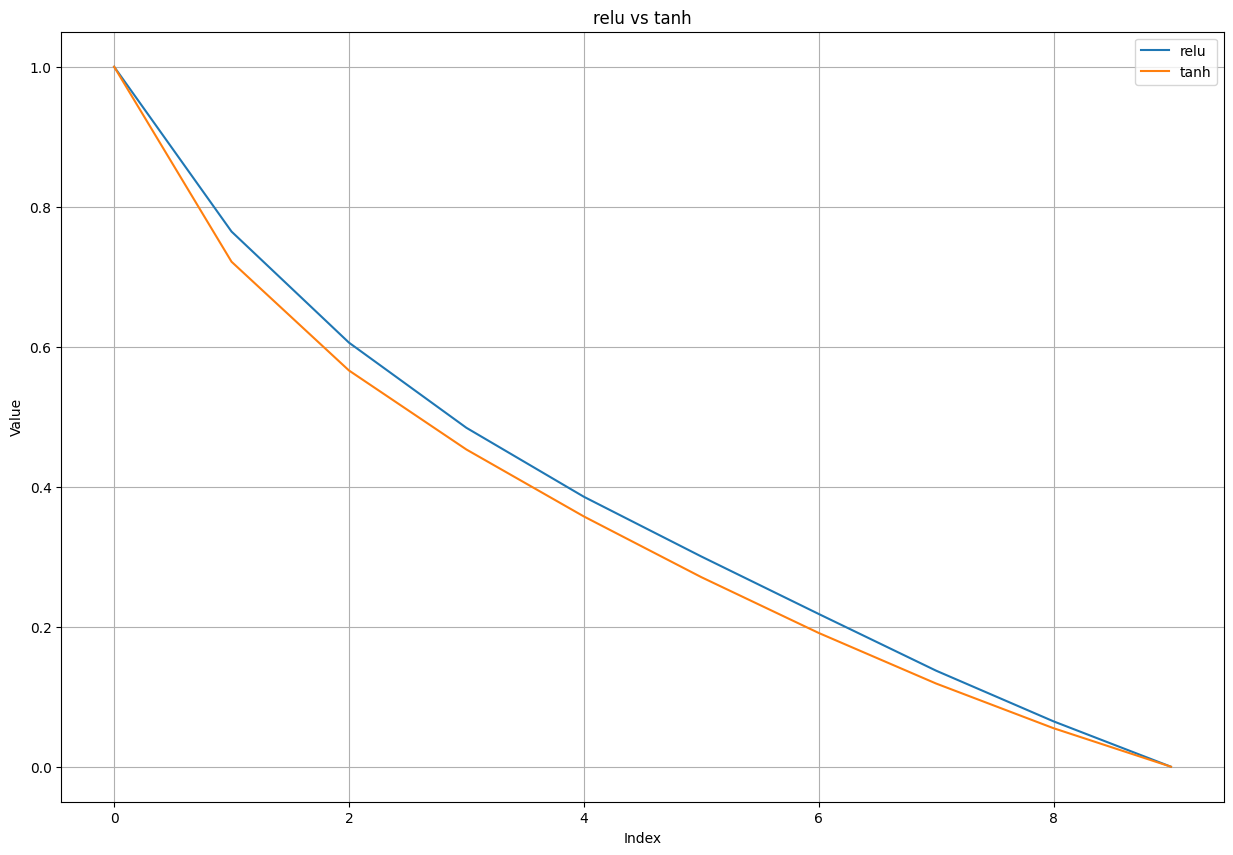

In [9]:

torch.manual_seed(123)

# compare relu activation to tanh activation
# collect 10 iterations of each

model_relu = SimpleNet()
relu_loss_fn = nn.MSELoss()
relu_opt = torch.optim.SGD(model_relu.parameters(), lr=0.1)
relu_loss_c = []
for epoch in range(10):
    loss = relu_loss_fn(model_relu(x_train), y_train)
    relu_loss_c.append(loss.item())
    
    relu_opt.zero_grad()
    loss.backward()
    relu_opt.step()

model_tanh = SimpleNet()
model_tanh.activate = nn.Tanh()

tanh_loss_fn = nn.MSELoss()
tanh_opt = torch.optim.SGD(model_tanh.parameters(), lr=0.1)

tanh_loss_c = []
for epoch in range(10):
    loss = tanh_loss_fn(model_tanh(x_train), y_train)
    tanh_loss_c.append(loss.item())
    tanh_opt.zero_grad()
    loss.backward()
    tanh_opt.step()

plt = None
try:
    import matplotlib.pyplot as plt
except:
    print("Installing matplotlib")
    !pip install -q matplotlib
    import matplotlib.pyplot as plt

relu_loss_c = torch.tensor(relu_loss_c)
tanh_loss_c = torch.tensor(tanh_loss_c)

relu_normalized = (relu_loss_c - relu_loss_c.min()) / (relu_loss_c.max() - relu_loss_c.min())
tanh_normalized = (tanh_loss_c - tanh_loss_c.min()) / (tanh_loss_c.max() - tanh_loss_c.min())
print(relu_normalized)
print(tanh_normalized)

plt.figure(figsize=(15, 10))
plt.plot(relu_normalized.tolist(), label='relu')
plt.plot(tanh_normalized.tolist(), label='tanh')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('relu vs tanh')
plt.legend()
plt.grid(True)
plt.show()
    